In [1]:
# Samantha Yin 
# 1004194258
# Assignment 4
!pip install pingouin

In [2]:
# import the library

# Import the numpy library
import numpy as np  
# Import the pandas library
import pandas as pd
# Import the matplotlib.pyplot library for data visualization
import matplotlib.pyplot as plt
# Import statsmodels.api
import statsmodels.api as sm
# Import the seaborn
import seaborn as sns
# Import ols
from statsmodels.formula.api import ols
# Import stats
from scipy import stats
# Import pg
import pingouin as pg
# Import TTestIndPower
from statsmodels.stats.power import TTestIndPower

In [3]:
## import the data 

# load the dataset using pandas and store it in the varaible "data"
data = pd.read_csv('INF2178_A4_data.csv')
# call the first 5 rows for reference 
data.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [4]:
#Display the info of data to understand the data type and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [5]:
# Display the summary of statistics for each column
# with count, mean, sd, min, 25% percentile, median, 75% percentile, max, sd of the date and numerical columns
data.describe()

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


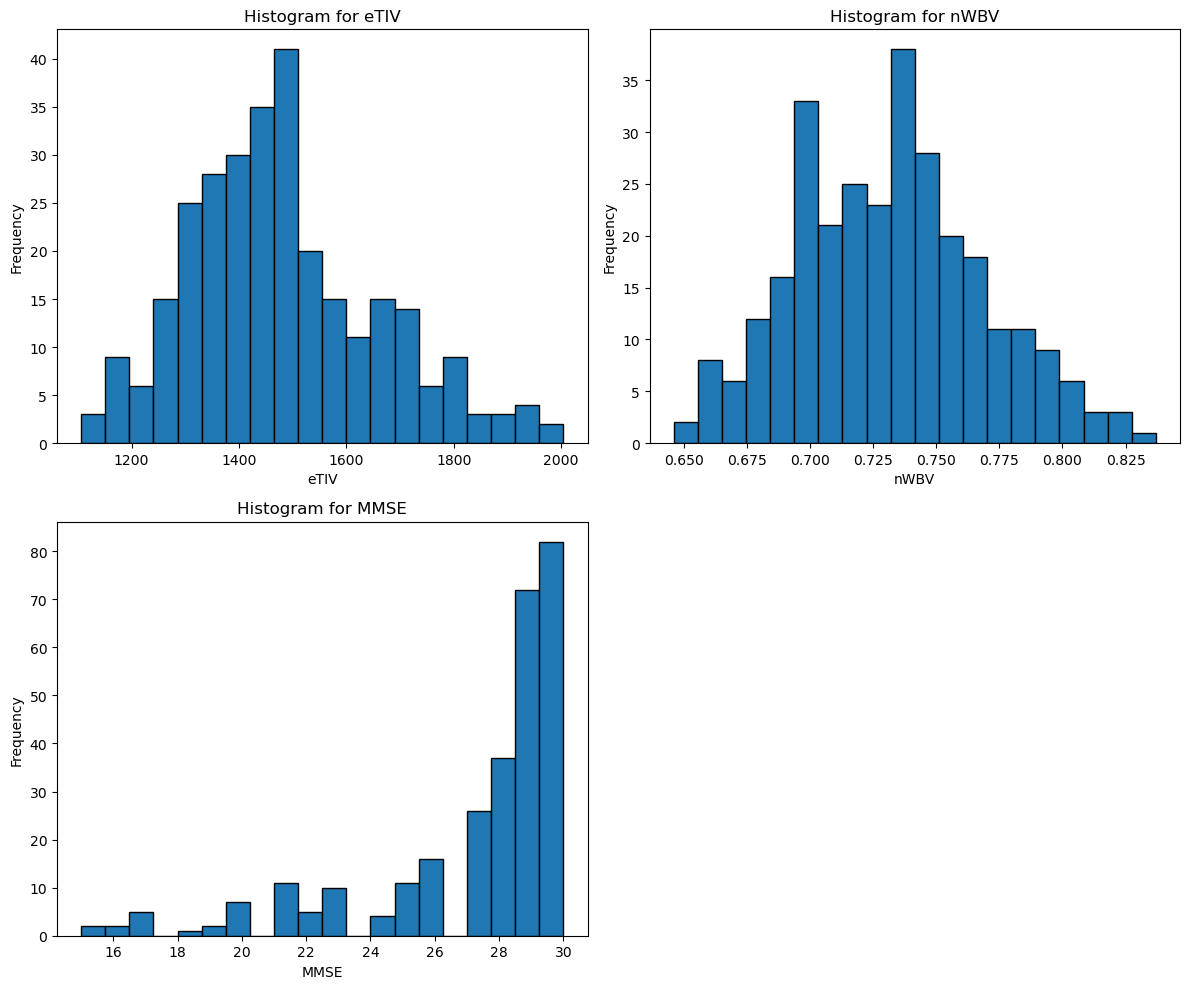

In [6]:
# Set up the plot with a specific size
plt.figure(figsize=(12, 10))

# Histogram for 'eTIV'
# arranges multiple plots in a 2x2 grid and at the first position
plt.subplot(2, 2, 1)
# plot for 'eTIV' with 20 bins and black edges
plt.hist(data['eTIV'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('Histogram for eTIV')
# label x-axis
plt.xlabel('eTIV')
# label y-axis
plt.ylabel('Frequency')

# Histogram for 'nWBV'
# arranges multiple plots in a 2x2 grid and at the second position
plt.subplot(2, 2, 2)
# plot for 'nWBV' with 20 bins and black edges
plt.hist(data['nWBV'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('Histogram for nWBV')
# label x-axis
plt.xlabel('nWBV')
# label y-axis
plt.ylabel('Frequency')

# Histogram for 'MMSE'
# arranges multiple plots in a 2x2 grid and at the second position
plt.subplot(2, 2, 3)
# plot for 'MMSE' with 20 bins and black edges
plt.hist(data['MMSE'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('Histogram for MMSE')
# label x-axis
plt.xlabel('MMSE')
# label y-axis
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

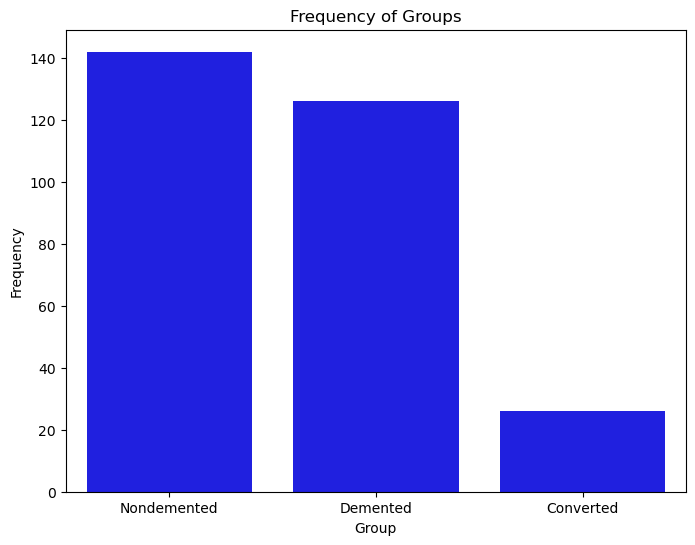

In [7]:
# Create a bar plot of Group: dementia, converted and nondemented
# Plot 'Group' with colour blue and arrange the bars by their frequency
plt.figure(figsize=(8, 6))  # Set the figure size as needed
# plot with 'Group' with colout blue
sns.countplot(x='Group', data=data, color='blue',
              order=data['Group'].value_counts().index)
# give the histogram a title
plt.title('Frequency of Groups')
# label x-axis
plt.xlabel('Group')
# label y-axis
plt.ylabel('Frequency')
plt.show()

In [8]:
# Count the number of 1 and 2 in "Visit"
group_count = data.groupby("Visit")["Subject ID"].nunique()
# print the result
group_count

Visit
1    150
2    144
Name: Subject ID, dtype: int64

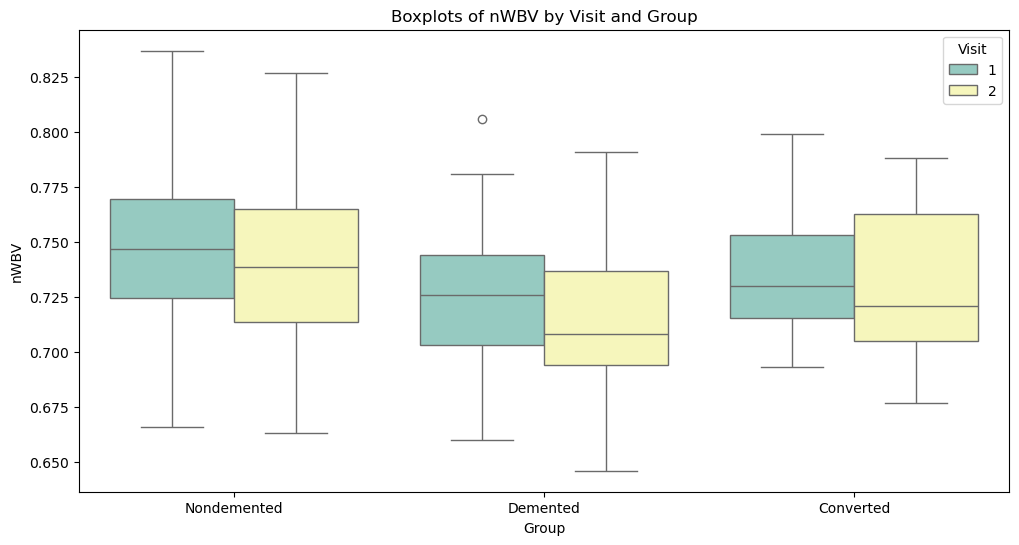

In [9]:
# Create the plot with specific size
plt.figure(figsize=(12, 6))
# plot with 'Group' as x, 'nWBV' as y, with hue as 'Visit'
sns.boxplot(x='Group', y='nWBV', hue='Visit', data=data, palette='Set3')
# Give the plot a title
plt.title('Boxplots of nWBV by Visit and Group')
# label x-axis
plt.xlabel('Group')
# label y-axis
plt.ylabel('nWBV')
# label the legend
plt.legend(title='Visit')
# print the plot
plt.show()

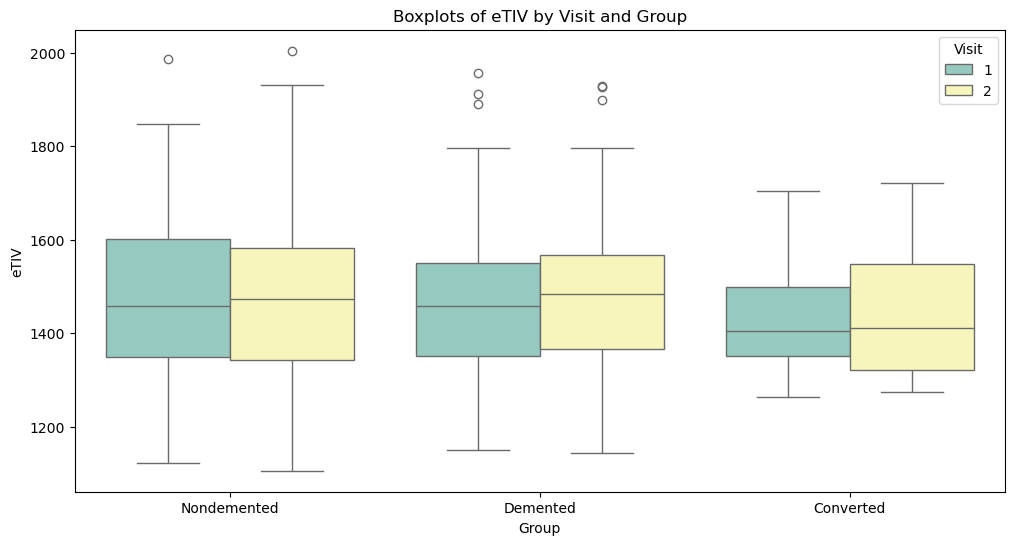

In [10]:
# Create the plot with specific size
plt.figure(figsize=(12, 6))
# plot with 'Group' as x, 'eTIV' as y, with hue as 'Visit'
sns.boxplot(x='Group', y='eTIV', hue='Visit', data=data, palette='Set3')
# Give the plot a title
plt.title('Boxplots of eTIV by Visit and Group')
# label x-axis
plt.xlabel('Group')
# label y-axis
plt.ylabel('eTIV')
# label the legend
plt.legend(title='Visit')
# print the plot
plt.show()

/tmp/ipykernel_162/1319081541.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='nWBV', hue='Group', dodge=True,


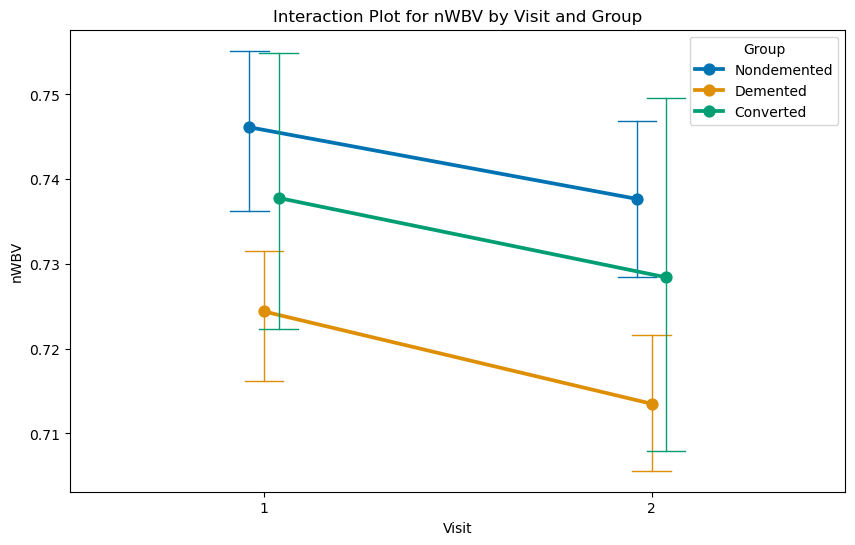

In [11]:
# Plor the interaction plot with specific size
plt.figure(figsize=(10, 6))
# For nWBV changes over Visit between different groups
sns.pointplot(data=data, x='Visit', y='nWBV', hue='Group', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind')
# Title of the plot 
plt.title('Interaction Plot for nWBV by Visit and Group')
# label x-axis
plt.xlabel('Visit')
# label y-axis
plt.ylabel('nWBV')
# label legend
plt.legend(title='Group')
plt.show()

In [12]:
# print the mean and sd of the 2 Visit grouped by Group
data.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [13]:
# Mixed-effect ANOVA 1
# nWBV as dependent variable, Visit as within-subjects factor, and Group as between-subjects factor
aov_r1 = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=data)

# Print ANOVA summary
pg.print_table(aov_r1)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [14]:
# Assumptions Testing
# mauchly's test of spericity
pg.sphericity(data=data, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [15]:
# test of Normality
pg.normality(data=data, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.990075,0.372060,True
2,0.989654,0.366703,True


In [16]:
# test of Homogeneity
pg.homoscedasticity(data=data, dv='nWBV', group='Group')

,W,pval,equal_var
levene,0.948773,0.38841,True


/tmp/ipykernel_162/2819078003.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='eTIV', hue='Group', dodge=True,


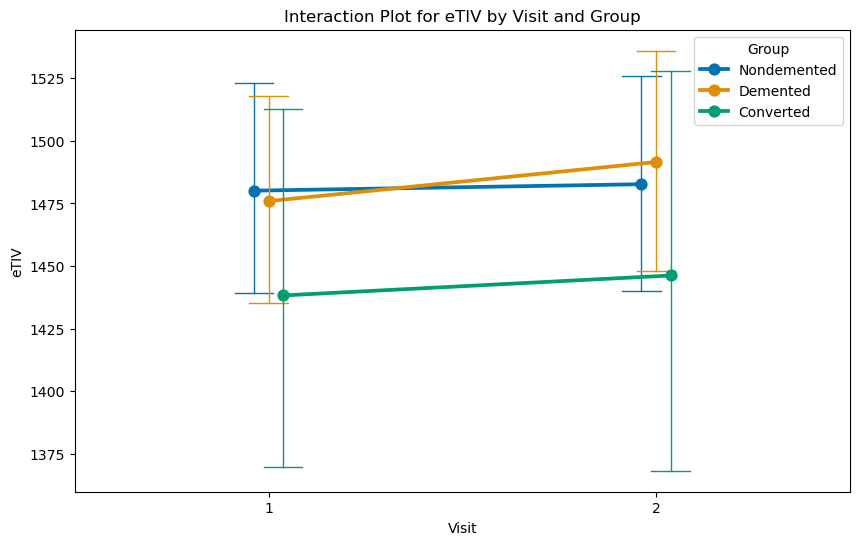

In [17]:
# Plor the interaction plot with specific size
plt.figure(figsize=(10, 6))
# For eTIV changes over Visit between different groups
sns.pointplot(data=data, x='Visit', y='eTIV', hue='Group', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind')
# Title of the plot 
plt.title('Interaction Plot for eTIV by Visit and Group')
# label x-axis
plt.xlabel('Visit')
# label y-axis
plt.ylabel('eTIV')
# label legend
plt.legend(title='Group')
# print the plot
plt.show()

In [18]:
# print the mean and sd of the 2 Visit grouped by Group
data.groupby(['Visit', 'Group'])['eTIV'].agg(['mean', 'std']).round(2)

mean     std
Visit Group                       
1     Converted    1438.29  132.95
      Demented     1475.94  173.62
      Nondemented  1480.11  183.75
2     Converted    1446.25  150.29
      Demented     1491.55  177.26
      Nondemented  1482.69  186.32

In [19]:
# Mixed-effect ANOVA 2
# eTIV as dependent variable, Visit as within-subjects factor, and Group as between-subjects factor
aov_r2 = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=data)

# print ANOVA summary
pg.print_table(aov_r2)


ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        37424.708      2    141  18712.354  0.297    0.743  0.004  nan
Visit         5573.920      1    141   5573.920  9.225    0.003  0.061    1.000
Interaction   1004.783      2    141    502.392  0.831    0.438  0.012  nan



In [20]:
# Assumptions Testing
# mauchly's test of spericity
pg.sphericity(data=data, dv='eTIV', subject='Subject ID', within='Visit')[-1]

1.0

In [21]:
#test of Normality
pg.normality(data=data, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.990075,0.372060,True
2,0.989654,0.366703,True


In [22]:
#test of Homogeneity
pg.homoscedasticity(data=data, dv='nWBV', group='Group')

,W,pval,equal_var
levene,0.948773,0.38841,True


Sample size required for power = 0.91, alpha = 0.05, and effect size = 0.7: 46.0


<Figure size 1000x600 with 0 Axes>

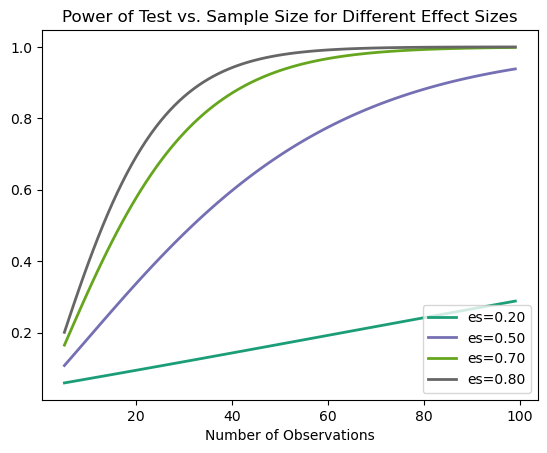

In [23]:
# Power analysis with power = 0.91, alpha = 0.05, and effect size = 0.7
effect_size = 0.7  # effect size
alpha = 0.05  # Significance level
power = 0.91  # power

# initiate the TTestIndPower
analysis = TTestIndPower()

# Calculate the sample size
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f"Sample size required for power = {power}, alpha = {alpha}, and effect size = {effect_size}: {np.ceil(sample_size)}")

# Generate effect size
effect_sizes = np.array([0.2, 0.5, 0.7, 0.8])
# Generate sample sizes
sample_sizes = np.array(range(5, 100))

# Plot power curves
plt.figure(figsize=(10, 6))
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=alpha)
# Give the power plot a title
plt.title('Power of Test vs. Sample Size for Different Effect Sizes')
# Print the plot
plt.show()